<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: KNN and Naive Bayes
© ExploreAI Academy

In this exercise, we train a k-nearest neighbours model and experiment with various parameters.

## Learning objectives

By the end of this train, you should be able to:
* Train a k-nearest neighbours model.
* Compare KNN models trained with different parameters. 

## Overview

K-nearest neighbours (KNN) is a simple, instance-based learning algorithm in which an observation's classification is determined by the majority vote of its neighbours. In this exercise, we will explore the KNN model's sensitivity to the choice of the number of neighbours (K) and the type of distance metric used.

## Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

## Load and prepare the dataset

The dataset used in this exercise is the `Breast Cancer` dataset provided by `scikit-learn`. This dataset comprises features crucial for distinguishing between malignant (cancerous) and benign (non-cancerous) tumours.

We aim to apply KNN models to this data to accurately classify malignant and benign tumours based on cell characteristics to aid in early diagnosis, guide treatment decisions, and potentially improve patient outcomes.

In [2]:
# Load the dataset
X, y = load_breast_cancer(return_X_y=True)

We then split the data to prepare the training and testing datasets.

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exercises

### Exercise 1

Let's experiment with different values of k to understand how it affects the accuracy and generalisation of the model.

Use a for loop to train different k-nearest neighbours models, each with a different number of neighbours as follows: `1, 3, 5, 7, 9`.
Evaluate each model's performance on the test set and print its accuracy score.

In [4]:
for k in [1,3,5,7,9]:
  knn = KNeighborsClassifier(k)
  knn.fit(X_train, y_train)
  print('accuracy_score: ', accuracy_score(y_test, knn.predict(X_test)))

accuracy_score:  0.9298245614035088
accuracy_score:  0.9298245614035088
accuracy_score:  0.956140350877193
accuracy_score:  0.956140350877193
accuracy_score:  0.956140350877193


### Exercise 2

Let's also compare the impact that different distance metrics will have on the accuracy of the KNN model.

Again, use a for loop to train different k-nearest neighbours models, each with a different distance metric as follows: `Euclidean, Manhattan, Chebyshev`. Evaluate each model's performance on the test set and print its accuracy score.

**Note:** You can use what seems to be the optimal number of neighbours based on the results from Exercise 1.

In [5]:
for d in ['euclidean', 'manhattan', 'chebyshev']:
  knn = KNeighborsClassifier(n_neighbors=5, metric=d)
  knn.fit(X_train, y_train)
  print('accuracy_score: ', accuracy_score(y_test, knn.predict(X_test)))

accuracy_score:  0.956140350877193
accuracy_score:  0.9473684210526315
accuracy_score:  0.956140350877193


### Exercise 3

**a)** 

We want to be able to train a KNN model using a given k and a distance metric. We will then plot the decision boundary to better understand how the model classifies different regions of the feature space based on the chosen k and metric.

The function below contains the code for visualising the decision boundary. You are required to complete it by adding appropriate parameters (this should include the feature dataset, the target dataset, the number of neighbours, and the distance metric) and lines of code such that it performs the function stated above.

**Note:** We train the model using only two features for ease of plotting.

In [6]:
def plot_decision_boundary(k, metric):
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X[:, [0,1]], y)

    # Create a mesh grid based on feature ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict class for each point on the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contours
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')  # Plot the training points
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"Decision Boundary for K={k} with {metric} metric")
    plt.show()

**b)** 

Use the function created in **section a** to plot the decision boundary of a KNN model trained using `5` nearest neighbours and the `Euclidean` distance metric. 

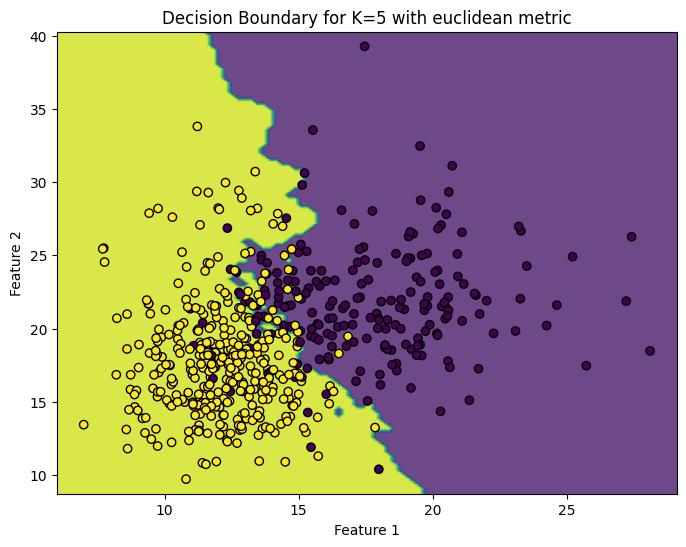

In [7]:
plot_decision_boundary(5,'euclidean')

## Solutions

### Exercise 1

In [ ]:
# List of different values of k to evaluate
k_values = [1, 3, 5, 7, 9]

# List to store accuracy scores of each KNN model for comparison
scores = []

# Loop over each value of k 
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"Accuracy for K={k}: {accuracy:.4f}")

In the for loop, a new instance of `KNeighborsClassifier` is created with the current `k` from the list. This classifier will consider 
`k` nearest neighbours to make predictions. The accuracy score for each `k` is then appended to the `scores` list and later printed for comparison.

Typically, a smaller k results in a model that captures more noise and details of the training data, potentially leading to overfitting. On the other hand, a larger k tends to smooth out the decision boundaries, which can improve generalisation but may also lead to underfitting if k is too large. 

From the results for our different k-values, we see that the accuracy stops increasing past `k=5`. This suggests that `k=5` could be the optimal choice for good accuracy while minimising the risk of overfitting or underfitting.

**Experiment**: What happens if you expand this list of k-values up to 20? Does this change your mind on which value might be the optimal one?


### Exercise 2

In [ ]:
# List of distance metrics to evaluate
metrics = ['Euclidean', 'Manhattan', 'Chebyshev']

# Loop over distance metric
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {metric} distance: {accuracy:.4f}")

The loop iterates over each metric specified in the `metrics` list. For each metric, a new instance of `KNeighborsClassifier` is created with `5` neighbours and the specified metric. The accuracy for each metric is then printed out.

We observe that although the differences may be subtle, the choice of distance metric can influence the accuracy of a KNN model depending on the dataset and the features' characteristics. 

From our results, it seems that the `Euclidean` and `Chebyshev` distances are equally effective for this particular dataset, while `Manhattan` performs slightly differently – which could be due to the nature of the dataset, such as scale and distribution of features.

### Exercise 3

**a)**

In [ ]:
# Function to plot decision boundaries 
def plot_decision_boundary(X, y, k, metric):
    # Train a KNN model using the specified number of neighbours and distance metric
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X[:, :2], y)  # Use only two features for simplicity

    # Create a mesh grid based on feature ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict class for each point on the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contours
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')  # Plot the training points
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"Decision Boundary for K={k} with {metric} metric")
    plt.show()

We add the following parameters to the function: 
- `X`: The feature dataset.
- `y`: The target dataset.
- `k`: The number of neighbours to use for the KNN classifier.
- `metric`: The distance metric to use in the KNN classifier.

We then add code to set up the KNN classifier with the specified number of neighbours and distance metric and train it using only the first two features of the dataset. 

**b)**

In [ ]:
# Plotting decision boundary
plot_decision_boundary(X_train, y_train, 5, 'Euclidean')

We call the `plot_decision_boundary` function and pass the appropriate arguments.

By experimenting with various values of k and different distance metrics, we have gained insight into how the parameters of the KNN model affect its performance. 


In our case, selecting an optimal value of k, around 5, and using the Euclidean distance metric provided the best balance between accuracy and model complexity for this particular dataset. We can use this as a basis to fine-tune our model further through other model-improvement techniques. 

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>